In [3]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [4]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)


x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# Linear Regression Model

In [15]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out


model = LinearRegression()
model

LinearRegression (
  (linear): Linear (1 -> 1)
)

# Definição da perda e otimizador

In [6]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-4)

## Treinamento

In [7]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train)

    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data[0]))

Epoch[20/1000], loss: 9.179435
Epoch[40/1000], loss: 6.564889
Epoch[60/1000], loss: 4.717040
Epoch[80/1000], loss: 3.411057
Epoch[100/1000], loss: 2.488026
Epoch[120/1000], loss: 1.835654
Epoch[140/1000], loss: 1.374567
Epoch[160/1000], loss: 1.048666
Epoch[180/1000], loss: 0.818309
Epoch[200/1000], loss: 0.655477
Epoch[220/1000], loss: 0.540368
Epoch[240/1000], loss: 0.458988
Epoch[260/1000], loss: 0.401444
Epoch[280/1000], loss: 0.360747
Epoch[300/1000], loss: 0.331956
Epoch[320/1000], loss: 0.311581
Epoch[340/1000], loss: 0.297152
Epoch[360/1000], loss: 0.286927
Epoch[380/1000], loss: 0.279672
Epoch[400/1000], loss: 0.274516
Epoch[420/1000], loss: 0.270844
Epoch[440/1000], loss: 0.268221
Epoch[460/1000], loss: 0.266340
Epoch[480/1000], loss: 0.264982
Epoch[500/1000], loss: 0.263994
Epoch[520/1000], loss: 0.263268
Epoch[540/1000], loss: 0.262727
Epoch[560/1000], loss: 0.262317
Epoch[580/1000], loss: 0.261999
Epoch[600/1000], loss: 0.261747
Epoch[620/1000], loss: 0.261541
Epoch[640/10

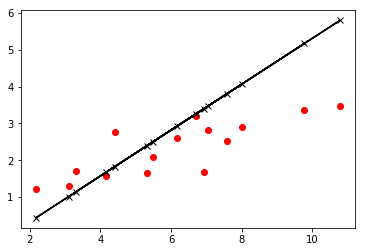

In [19]:
y_pred = model(Variable(x_train))
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

## Parametros

In [14]:
for p,w in model.state_dict().items():
    print(p, w.numpy())

linear.weight [[ 0.37955016]]
linear.bias [-0.08360373]
